## Tarea 3: Relaciones Entre Variables

In [5]:
#Carga de datos (Nuevo dataset con valores nulos reparados)
datos_corregidos <- read.csv("Carga de datos/datos_corregidos.csv")

#Lectura del dataset corregido
str(datos_corregidos)

'data.frame':	15 obs. of  3 variables:
 $ Edad        : num  25 34 28 40 35 50 23 31 27 34.5 ...
 $ Satisfaccion: int  5 4 3 5 4 2 5 3 4 4 ...
 $ Region      : chr  "Norte" "Centro" "Sur" "Centro" ...


## 1.Edad por Región

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


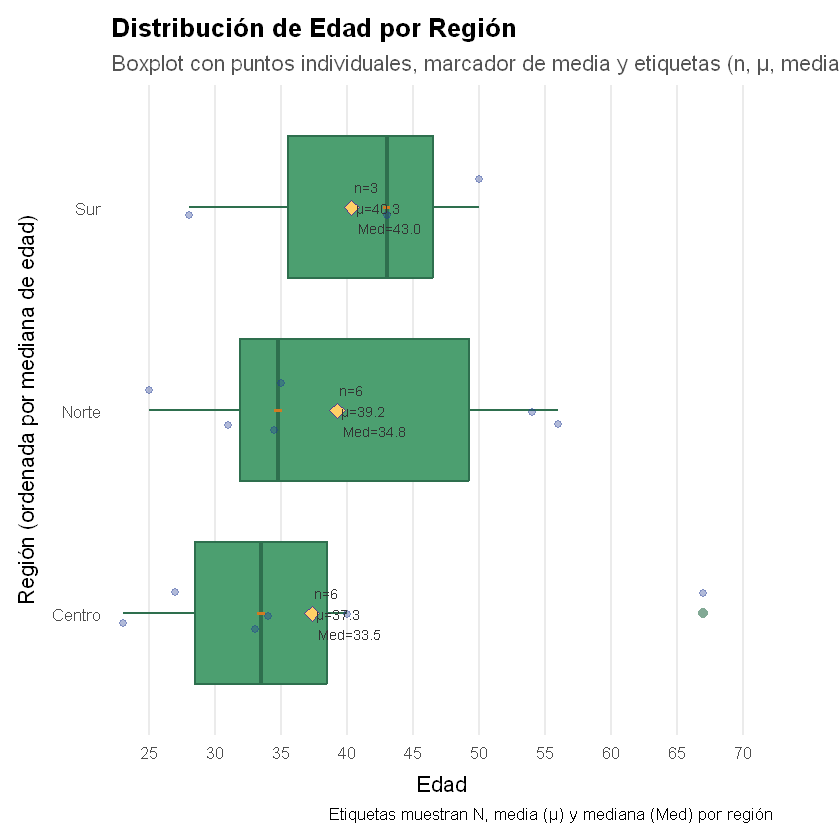

In [8]:
# Cargar librerías necesarias para la visualización
library(ggplot2)
library(scales)

# Boxplot de edad por región con etiquetas (n, media y mediana)
reg_levels <- levels(factor(datos_corregidos$Region))
reg_mean <- tapply(
  datos_corregidos$Edad, datos_corregidos$Region, mean, na.rm = TRUE
)
reg_med <- tapply(
  datos_corregidos$Edad, datos_corregidos$Region, median, na.rm = TRUE
)
reg_n <- table(datos_corregidos$Region)[reg_levels]

stats_df <- data.frame(
  Region = reg_levels,
  mean = as.numeric(reg_mean[reg_levels]),
  median = as.numeric(reg_med[reg_levels]),
  n = as.numeric(reg_n),
  label = sprintf(
    "n=%d\nμ=%.1f\nMed=%.1f",
    as.numeric(reg_n),
    as.numeric(reg_mean[reg_levels]),
    as.numeric(reg_med[reg_levels])
  )
)

ggplot(
  datos_corregidos,
  aes(x = reorder(Region, Edad, FUN = median), y = Edad)
) +
  geom_boxplot(
    outlier.shape = 16,
    outlier.size = 2.5,
    outlier.alpha = 0.6,
    fill = "#4C9F70",
    color = "#2E6F4E",
    width = 0.7,
    na.rm = TRUE
  ) +
  geom_jitter(
    width = 0.15,
    height = 0,
    alpha = 0.35,
    size = 1.8,
    color = "#1F3A93",
    na.rm = TRUE
  ) +
  stat_summary(
    fun = mean,
    geom = "point",
    shape = 23,
    size = 3,
    fill = "#FFD166",
    color = "#593C8F",
    na.rm = TRUE
  ) +
  geom_segment(
    data = stats_df,
    aes(
      x = reorder(Region, median),
      xend = reorder(Region, median),
      y = median - 0.3,
      yend = median + 0.3
    ),
    inherit.aes = FALSE,
    color = "#D17A22",
    size = 1.1
  ) +
  geom_text(
    data = stats_df,
    aes(
      x = reorder(Region, median),
      y = mean,
      label = label
    ),
    inherit.aes = FALSE,
    hjust = -0.1,
    vjust = 0.5,
    size = 3,
    color = "#333333"
  ) +
  coord_flip(clip = "off") +
  labs(
    title = "Distribución de Edad por Región",
    subtitle = paste(
      "Boxplot con puntos individuales, marcador de media y",
      "etiquetas (n, μ, mediana)"
    ),
    x = "Región (ordenada por mediana de edad)",
    y = "Edad",
    caption = paste(
      "Etiquetas muestran N, media (μ) y mediana (Med) por región"
    )
  ) +
  scale_y_continuous(
    breaks = scales::pretty_breaks(8),
    expand = expansion(mult = c(0.02, 0.12))
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(color = "#555555"),
    axis.title.x = element_text(margin = margin(t = 8)),
    axis.title.y = element_text(margin = margin(r = 8)),
    panel.grid.major.y = element_blank(),
    panel.grid.minor = element_blank(),
    plot.margin = margin(10, 40, 10, 10)
  )

## Interpretación del gráfico: Distribución de Edad por Región

### Qué muestra el gráfico
El gráfico es un **boxplot de la distribución de edades por región** (Centro, Norte y Sur). Incluye:
- **Puntos individuales**: cada observación
- **Caja**: rango intercuartílico (50% central de los datos)
- **Línea dentro de la caja**: mediana
- **Rombo**: media
- **Etiquetas**: tamaño de muestra (n), media (μ) y mediana (Med)



### Interpretación por región

#### **Centro**
- **n = 6**
- **Media (μ) ≈ 37,3 años**
- **Mediana (Med) ≈ 33,5 años**
- La mayoría de las edades se concentran entre **30 y 35 años**.
- Existe un **valor atípico alto (~67 años)** que eleva la media por encima de la mediana.
- La distribución presenta **asimetría positiva** (cola hacia edades mayores).

Región predominantemente joven, con presencia de un outlier relevante.



#### **Norte**
- **n = 6**
- **Media (μ) ≈ 39,2 años**
- **Mediana (Med) ≈ 34,8 años**
- Es la región con **mayor dispersión de edades**.
- Se observan edades jóvenes (~25–30) y mayores (~55).
- La media supera a la mediana, indicando **asimetría a la derecha**.

Región con mayor heterogeneidad etaria.



#### **Sur**
- **n = 3**
- **Media (μ) = Mediana (Med) ≈ 43 años**
- Edades concentradas aproximadamente entre **35 y 50 años**.
- Variabilidad baja, pero con **tamaño muestral reducido**.

Región con población aparentemente más madura, aunque con baja representatividad.



### Comparación general
- **Menor edad central**: Centro  
- **Mayor variabilidad**: Norte  
- **Mayor edad típica**: Sur  
- En Centro y Norte, la **media es mayor que la mediana**, lo que indica influencia de valores altos.



### Consideración metodológica
Los tamaños muestrales son **pequeños (n ≤ 6)**, especialmente en la región Sur. Por ello, los resultados deben interpretarse como **exploratorios** y no generalizables.


## 2.Satisfacción por Región

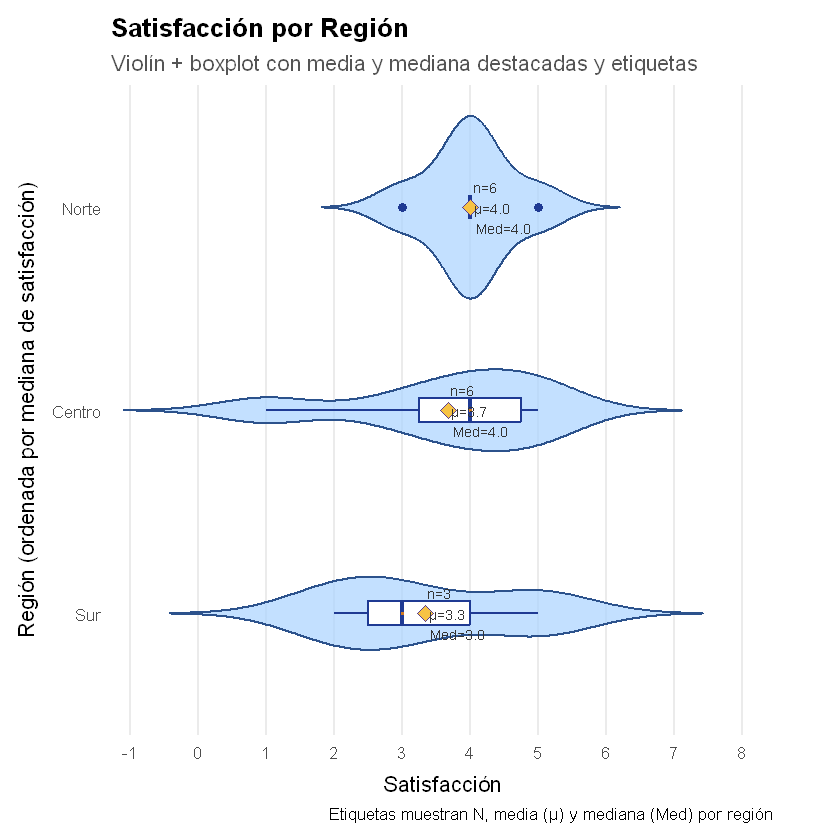

In [ ]:
# Distribución de satisfacción por región con etiquetas informativas
# Resumen por región: N, media y mediana
reg_levels <- levels(factor(datos_corregidos$Region))
reg_mean <- tapply(
    datos_corregidos$Satisfaccion, datos_corregidos$Region, mean, na.rm = TRUE
)
reg_med <- tapply(
    datos_corregidos$Satisfaccion, datos_corregidos$Region, median, na.rm = TRUE
)
reg_n <- table(datos_corregidos$Region)[reg_levels]
stats_df <- data.frame(
    Region = reg_levels,
    mean = as.numeric(reg_mean[reg_levels]),
    median = as.numeric(reg_med[reg_levels]),
    n = as.numeric(reg_n),
    label = sprintf("n=%d\nμ=%.1f\nMed=%.1f", as.numeric(reg_n),
                                    as.numeric(reg_mean[reg_levels]),
                                    as.numeric(reg_med[reg_levels]))
)

ggplot(
    datos_corregidos,
    aes(x = reorder(Region, Satisfaccion, FUN = median), y = Satisfaccion)
) +
    geom_violin(
        fill = "#A9D3FF", color = "#2C528C", alpha = 0.7, trim = FALSE, na.rm = TRUE
    ) +
    geom_boxplot(
        width = 0.12, outlier.shape = 16, outlier.size = 2.2, fill = "white",
        color = "#1F3A93", na.rm = TRUE
    ) +
    # Línea de mediana por región (como referencia)
    geom_segment(
        data = stats_df,
        aes(x = reorder(Region, median), xend = reorder(Region, median),
                y = median - 0.02, yend = median + 0.02),
        inherit.aes = FALSE, color = "#D17A22", size = 1.1
    ) +
    # Punto de la media por región (ya existía, se mantiene)
    stat_summary(
        fun = mean, geom = "point", shape = 23, size = 3.2, fill = "#F6C344",
        color = "#593C8F", na.rm = TRUE
    ) +
    # Etiquetas con N, media y mediana por región
    geom_text(
        data = stats_df,
        aes(
            x = reorder(Region, median), y = mean, label = label
        ),
        inherit.aes = FALSE, hjust = -0.1, vjust = 0.5, size = 3,
        color = "#333333"
    ) +
    coord_flip(clip = "off") +
    labs(
        title = "Satisfacción por Región",
        subtitle = "Violín + boxplot con media y mediana destacadas y etiquetas",
        x = "Región (ordenada por mediana de satisfacción)",
        y = "Satisfacción",
        caption = "Etiquetas muestran N, media (μ) y mediana (Med) por región"
    ) +
    scale_y_continuous(
        breaks = scales::pretty_breaks(8),
        expand = expansion(mult = c(0.02, 0.12))
    ) +
    theme_minimal(base_size = 13) +
    theme(
        plot.title = element_text(face = "bold"),
        plot.subtitle = element_text(color = "#555555"),
        axis.title.x = element_text(margin = margin(t = 8)),
        axis.title.y = element_text(margin = margin(r = 8)),
        panel.grid.major.y = element_blank(),
        panel.grid.minor = element_blank(),
        plot.margin = margin(10, 40, 10, 10)
    )

## Interpretación del gráfico: Satisfacción por Región

### Qué muestra el gráfico
El gráfico representa la **distribución de la satisfacción por región** (Norte, Centro y Sur) mediante un **violin plot combinado con boxplot**, destacando:
- **Distribución completa de los datos** (violín)
- **Mediana** (línea en el boxplot)
- **Media** (rombo)
- **Tamaño de muestra (n)**


### Interpretación por región

#### **Norte**
- **n = 6**
- **Media (μ) = 4,0**
- **Mediana (Med) = 4,0**
- La satisfacción se concentra claramente en torno al valor 4.
- Distribución relativamente simétrica y con **baja dispersión**.

Región con satisfacción alta y homogénea.


#### **Centro**
- **n = 6**
- **Media (μ) ≈ 3,7**
- **Mediana (Med) = 4,0**
- Mayor amplitud en la distribución que en el Norte.
- Presencia de valores más bajos que reducen ligeramente la media.

 Satisfacción generalmente alta, pero con mayor diversidad de experiencias.



#### **Sur**
- **n = 3**
- **Media (μ) ≈ 3,3**
- **Mediana (Med) = 3,0**
- Nivel de satisfacción central más bajo.
- Variabilidad moderada, con **muestra limitada**.

 Región con menor satisfacción percibida, aunque con baja representatividad.


### Comparación general
- **Mayor satisfacción y estabilidad**: Norte  
- **Satisfacción alta pero más dispersa**: Centro  
- **Menor satisfacción central**: Sur  


### Consideración metodológica
Los tamaños muestrales son **reducidos (n ≤ 6)**, especialmente en la región Sur, por lo que los resultados deben interpretarse como **exploratorios**.


## 3.Relación entre Edad y Satisfacción

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
`geom_smooth()` using formula = 'y ~ x'


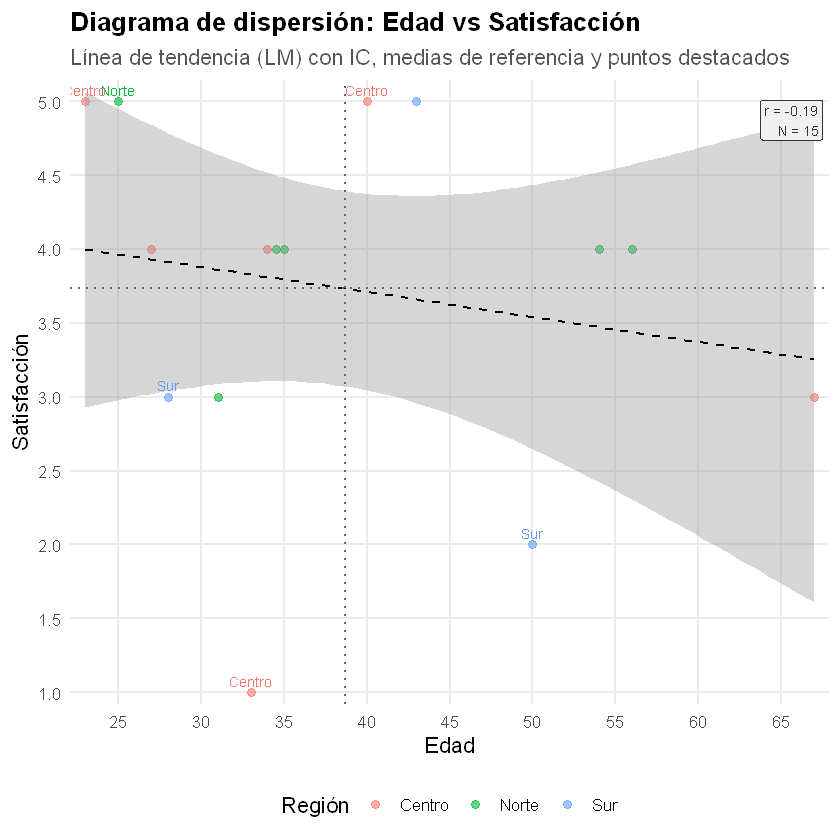

In [ ]:
# Diagrama de dispersión de Edad vs Satisfacción con mejoras y anotaciones
cor_val <- cor(datos_corregidos$Edad, datos_corregidos$Satisfaccion, use = "complete.obs")
n_obs <- sum(complete.cases(datos_corregidos[, c("Edad", "Satisfaccion")]))

# Etiquetar algunos puntos representativos (top y bottom por Satisfacción)
top_idx <- head(order(datos_corregidos$Satisfaccion, decreasing = TRUE), 3)
bot_idx <- head(order(datos_corregidos$Satisfaccion, decreasing = FALSE), 3)
labels_df <- datos_corregidos[c(top_idx, bot_idx), ]

ggplot(
    datos_corregidos,
    aes(x = Edad, y = Satisfaccion, color = Region)
) +
    geom_point(
        alpha = 0.6,
        size = 2,
        na.rm = TRUE
    ) +
    # Tendencia global con intervalo de confianza
    geom_smooth(
        method = "lm",
        se = TRUE,
        color = "black",
        linetype = "dashed",
        size = 0.8
    ) +
    # Etiquetas en puntos destacados
    geom_text(
        data = labels_df,
        aes(label = Region),
        vjust = -0.6,
        size = 3,
        show.legend = FALSE
    ) +
    # Líneas de referencia (medias)
    geom_vline(
        xintercept = mean(datos_corregidos$Edad, na.rm = TRUE),
        linetype = "dotted",
        color = "#666666"
    ) +
    geom_hline(
        yintercept = mean(datos_corregidos$Satisfaccion, na.rm = TRUE),
        linetype = "dotted",
        color = "#666666"
    ) +
    # Anotación con correlación y N
    annotate(
        "label",
        x = Inf,
        y = Inf,
        label = sprintf("r = %.2f\nN = %d", cor_val, n_obs),
        hjust = 1.1,
        vjust = 1.5,
        size = 3,
        fill = "#F0F0F0",
        color = "#333333"
    ) +
    labs(
        title = "Diagrama de dispersión: Edad vs Satisfacción",
        subtitle = "Línea de tendencia (LM) con IC, medias de referencia y puntos destacados",
        x = "Edad",
        y = "Satisfacción",
        color = "Región"
    ) +
    scale_x_continuous(
        breaks = scales::pretty_breaks(8),
        expand = expansion(mult = c(0.02, 0.02))
    ) +
    scale_y_continuous(
        breaks = scales::pretty_breaks(8),
        expand = expansion(mult = c(0.02, 0.02))
    ) +
    theme_minimal(base_size = 13) +
    theme(
        plot.title = element_text(face = "bold"),
        plot.subtitle = element_text(color = "#555555"),
        legend.position = "bottom",
        panel.grid.minor = element_blank()
    )


## Interpretación del gráfico: Edad vs Satisfacción

### Qué muestra el gráfico
El gráfico presenta un **diagrama de dispersión** que analiza la relación entre:
- **Edad** (eje X)
- **Satisfacción** (eje Y)

Las observaciones están diferenciadas por **región** (Centro, Norte y Sur). Se incluye:
- **Línea de tendencia lineal (LM)**
- **Intervalo de confianza**
- **Líneas de referencia** de la media de edad y satisfacción
- **Coeficiente de correlación (r)** y tamaño de muestra (N)


### Relación entre edad y satisfacción
- **Coeficiente de correlación**: `r = −0,19`
- **Tamaño de muestra**: `N = 15`

La correlación es **negativa y débil**, lo que indica que, en promedio, la satisfacción disminuye ligeramente con la edad, aunque el efecto es muy reducido.

El **intervalo de confianza amplio** y la dispersión de los puntos sugieren que el modelo lineal tiene **baja capacidad explicativa**.


### Análisis por región

#### **Centro**
- Alta variabilidad en los niveles de satisfacción.
- Presencia de **valores extremos**, tanto altos como bajos.
- Contribuye de forma importante a la dispersión global.

#### **Norte**
- Puntos concentrados en **niveles altos de satisfacción (4–5)**.
- Menor variabilidad, especialmente en edades jóvenes y medias.

#### **Sur**
- Mayor dispersión en la satisfacción.
- Casos de **satisfacción baja en edades medias y altas**.


### Conclusión general
- La **edad no muestra una relación fuerte con la satisfacción**.
- La variabilidad observada sugiere que **otros factores** (región, contexto, experiencias individuales) podrían ser más relevantes.
- Los resultados deben interpretarse con cautela debido al **tamaño muestral limitado**.


### Consideración metodológica
Con un **N reducido (15 observaciones)**, este análisis es **exploratorio** y no permite establecer relaciones causales.
